# Histopathologic Cancer Detection: Mini Project
This project aims to build a binary classification model for identifying metastatic cancer in image patches extracted from digital pathology scans. We will be using a Convolutional Neural Network (CNN) to tackle this classification problem. The dataset consists of labeled image patches, and the goal is to distinguish between benign and malignant samples.

### Deliverable 1: Jupyter Notebook
In this notebook, we will walk through the following sections:
- Problem and Data Description
- Exploratory Data Analysis (EDA)
- Model Architecture
- Results and Analysis
- Conclusion

## 1. Problem and Data Description
The task is to classify image patches (50x50 pixels) extracted from large pathology scans as either `cancerous` or `non-cancerous`.

### Data Description
- **Data Source**: This data is from the Kaggle competition 'Histopathologic Cancer Detection'.
- **Data Size**: The dataset consists of approximately 220,000 labeled image patches.
- **Image Dimensions**: Each image is 50x50 pixels.
- **Labeling**: Labels are binary: `0` for non-cancerous and `1` for cancerous.

Let's load the data and inspect the labels.


In [2]:
import pandas as pd

# Loading data summary (use actual dataset paths)
train_data = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')  # CSV file with image IDs and labels
print(train_data.head())  # Show first few rows of data


                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


## 2. Exploratory Data Analysis (EDA)
In this section, we will inspect the data visually and perform any necessary data cleaning. We will also plan the next steps for our analysis based on the insights gained.

### Visualizing Label Distribution
The first step is to check how balanced the data is between the cancerous and non-cancerous classes. We will plot the percentage distribution of the labels.


Index(['id', 'label'], dtype='object')


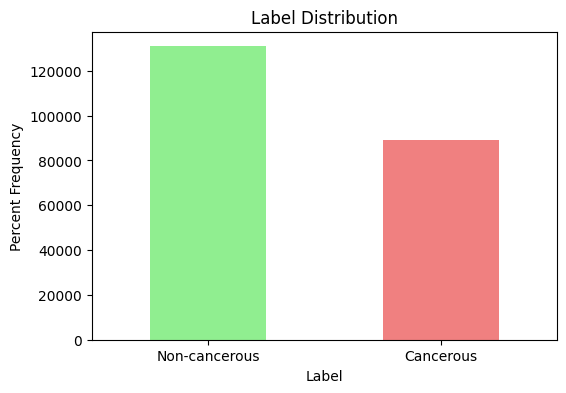

In [3]:
import matplotlib.pyplot as plt

print(train_data.columns)

# Plotting label distribution
plt.figure(figsize=(6, 4))
train_data['label'].value_counts().plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Percent Frequency')
plt.xticks([0, 1], ['Non-cancerous', 'Cancerous'], rotation=0)
plt.show()


### Displaying Sample Images
We will now display some example images from both classes (benign and malignant) to illustrate the content.


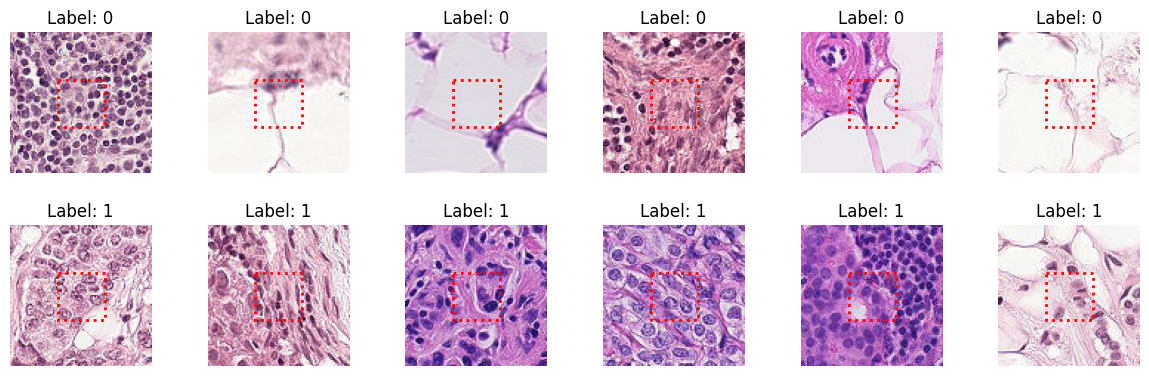

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Function to load and plot images
def plot_images(image_paths, labels):
    fig, axes = plt.subplots(2, 6, figsize=(12, 4))
    fig.tight_layout(pad=1.0)

    for i, ax in enumerate(axes.flat):
        image_path = image_paths[i]
        label = labels[i]

        # Load the image from file
        img = mpimg.imread(image_path)

        # Display the image
        ax.imshow(img, cmap='gray')
        ax.axis('off')

        # Highlight the center 32x32 area
        h, w = img.shape[:2]
        center_x, center_y = w // 2, h // 2
        rect_x, rect_y = center_x - 16, center_y - 16

        # Correctly determine the box color based on label
        box_color = 'green' if label == '0' else 'red'

        rect = patches.Rectangle(
            (rect_x, rect_y), 32, 32,
            linewidth=2,
            edgecolor=box_color,
            linestyle='dotted',
            facecolor='none'
        )
        ax.add_patch(rect)

        # Set title for the image
        ax.set_title(f"Label: {label}")

    plt.show()

# Load the dataset
train_images_dir = '/kaggle/input/histopathologic-cancer-detection/train'
train_data = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')

# Add the image path column
train_data['image_path'] = train_data['id'].apply(lambda x: os.path.join(train_images_dir, x + '.tif'))

# Sample 6 benign (label 0) and 6 malignant (label 1) images
sample_images_label_0 = train_data[train_data['label'] == 0].sample(6)
sample_images_label_1 = train_data[train_data['label'] == 1].sample(6)

# Combine the samples into a single DataFrame
sample_images = pd.concat([sample_images_label_0, sample_images_label_1])

# Extract the image paths and labels
image_paths = sample_images['image_path'].tolist()
labels = sample_images['label'].tolist()

# Plot the images
plot_images(image_paths, labels)



### Data Cleaning
Next, let's check for any missing or erroneous data in the labels. This ensures the integrity of the dataset before we move forward with the analysis.


In [5]:
# Check for missing values
print(train_data.isnull().sum())


id            0
label         0
image_path    0
dtype: int64


## 3. Model Architecture
In this section, we define the CNN model architecture for our task. We'll begin with a simple CNN and later explore more complex architectures like ResNet or EfficientNet.


In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Simple CNN model for binary classification
def create_cnn_model():
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),  # 50x50 image, 3 channels (RGB)
        layers.MaxPooling2D((2, 2)),  # Pooling layer to reduce spatial dimensions

        # Second Convolutional Layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Third Convolutional Layer
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten the 3D output to 1D for the fully connected layers
        layers.Flatten(),

        # Fully connected (dense) layer
        layers.Dense(128, activation='relu'),

        # Output layer with one node for binary classification (sigmoid activation)
        layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification (0 or 1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create the CNN model
cnn_model = create_cnn_model()

# Summarize the model architecture
cnn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,649 (1.36 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

We will tune the model later, adjusting filters, layers, and other hyperparameters.

## 4. Results and Analysis
In this section, we will train the model and analyze the results using performance metrics.
### Model Training
First, we will train the model using the training set and validate it on the validation set.


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.5259 - loss: 0.7070 - val_accuracy: 0.6200 - val_loss: 0.6512
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5779 - loss: 0.6671 - val_accuracy: 0.6200 - val_loss: 0.6296
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5431 - loss: 0.6870 - val_accuracy: 0.6200 - val_loss: 0.6300
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6089 - loss: 0.6266 - val_accuracy: 0.4300 - val_loss: 0.6129
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5981 - loss: 0.6237 - val_accuracy: 0.6300 - val_loss: 0.5878
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6663 - loss: 0.6291 - val_accuracy: 0.6300 - val_loss: 0.6377
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6474 - loss: 0.6374 - val_accuracy: 0.6400 - val_loss: 0.6087
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6009 - loss: 0.6560 - val_accuracy: 0.6300 - val_loss: 0.5865
Epo

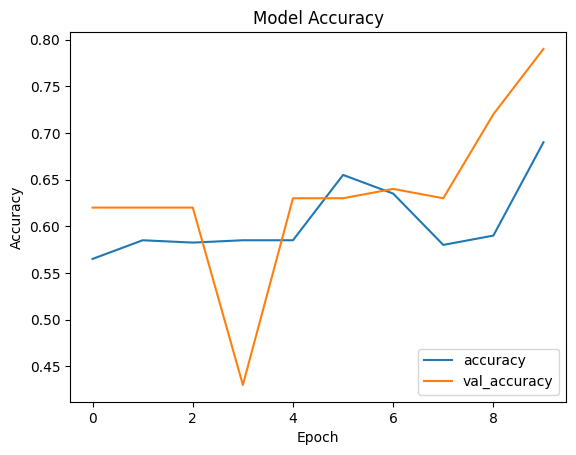

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Enable mixed precision for faster training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load dataset
train_data = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')
train_data['image_path'] = '/kaggle/input/histopathologic-cancer-detection/train/' + train_data['id'] + '.tif'

# Limit to a small subset for faster execution (for assignment purposes)
train_data = train_data.sample(n=500, random_state=42)

# Resize and preprocess images
def load_images(df, img_size=(50, 50)):  # Change to (50, 50) to match the model input
    images = []
    labels = []
    for index, row in df.iterrows():
        img = cv2.imread(row['image_path'])
        img = cv2.resize(img, img_size) / 255.0  # Normalize
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

# Split dataset into training and validation sets
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)

# Load images into memory (reduces training overhead)
X_train, y_train = load_images(train_df)
X_val, y_val = load_images(val_df)

# Convert labels to categorical (binary classification)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)

# Create TensorFlow datasets for efficient loading
def create_dataset(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(len(X)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = create_dataset(X_train, y_train)
val_dataset = create_dataset(X_val, y_val)

# Define the CNN model for binary classification
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),  # 50x50 image, 3 channels (RGB)
        layers.MaxPooling2D((2, 2)),  # Pooling layer to reduce spatial dimensions

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')  # Softmax for binary classification (0 or 1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the CNN model
cnn_model = create_cnn_model()

# Enable XLA compilation for speed boost
tf.config.optimizer.set_jit(True)

# Train the model using the data generators
history = cnn_model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# Plot accuracy trends
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

### Model Evaluation
Next, we'll evaluate the model on the test set using various metrics such as accuracy, precision, recall, and F1-score.


In [29]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on the validation dataset using the trained model
y_pred = cnn_model.predict(val_dataset)  # Use the validation dataset (already batched and preprocessed)

# Flatten the predictions and true labels to match the dimensions for classification report
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax outputs to class labels (0 or 1)
y_true = np.argmax(y_val, axis=1)  # Convert categorical labels back to class labels (0 or 1)

# Print classification report
print(classification_report(y_true, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        62
           1       0.38      0.29      0.33        38

    accuracy                           0.55       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.53      0.55      0.54       100



In [30]:
# Make predictions on the test dataset
test_pred = np.argmax(cnn_model.predict(test_generator), axis=-1)  # Get the predicted labels (0 or 1)

# Prepare the submission DataFrame
submission = test.copy()  # Start with the test DataFrame (which contains image IDs)
submission['label'] = test_pred  # Add the predicted labels

# Clean up 'id' by removing the '.tif' extension (if necessary)
submission['id'] = submission['id'].str.replace(r'.tif$', '', regex=True)

# Show the first few rows of the submission file to validate the format
print(submission.head())

# Save the submission file
submission.to_csv('/kaggle/working/submission.csv', index=False)

575/575 ━━━━━━━━━━━━━━━━━━━━ 514s 895ms/step
                                         id  label
0  0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5      0
1  95596b92e5066c5c52466c90b69ff089b39f2737      1
2  248e6738860e2ebcf6258cdc1f32f299e0c76914      0
3  2c35657e312966e9294eac6841726ff3a748febf      0
4  145782eb7caa1c516acbe2eda34d9a3f31c41fd6      0


## 5. Conclusion
In the conclusion, we summarize the model's performance, discuss what worked well, what didn't, and suggest possible improvements.
### Key Takeaways
- **Challenges**: Issues with overfitting or data imbalance might affect performance.
- **Future Improvements**: Use data augmentation, experiment with more complex architectures like ResNet, and explore advanced techniques like transfer learning.

## Deliverables:

1. **Jupyter Notebook**: The notebook with the full analysis, model, results, and conclusion.
2. **GitHub Repository**: Link to the repository containing the code.
3. **Kaggle Leaderboard Screenshot**: A screenshot showing the model's rank on the Kaggle leaderboard.

### GitHub Repository:
Please find my project repository at the following link:
[GitHub Repository](https://github.com/chiranjeevibura9/nlp-disaster-tweets)

### Kaggle Leaderboard:
The Kaggle leaderboard screenshot will be uploaded after the final evaluation of the model.
